## UN Data Exploration: Thomas Davis

## #3  - Import required packages.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## #4 - Read in data for gdp_df and find first and last 10 rows. 

In [2]:
gdp_df = pd.read_csv("../data/gpd_per_capita.csv")

#### "gpd_per_capita" was downloaded on October 3rd, 2024.

In [3]:
gdp_df.head(10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
5,Afghanistan,2016,2101.422187,NaN
6,Afghanistan,2015,2108.714173,NaN
7,Afghanistan,2014,2144.449634,NaN
8,Afghanistan,2013,2165.340915,NaN
9,Afghanistan,2012,2122.830759,NaN


In [4]:
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
7652,Zimbabwe,1999,2866.032886,NaN
7653,Zimbabwe,1998,2931.725144,NaN
7654,Zimbabwe,1997,2896.147308,NaN
7655,Zimbabwe,1996,2867.026043,NaN
7656,Zimbabwe,1995,2641.378271,NaN
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN
7661,Zimbabwe,1990,2704.757299,NaN


## #5 - Drop the 'Value Footnotes' column, and rename the remaining columns to 'Country', 'Year', and 'GDP_Per_Capita'.

In [5]:
gdp_df = gdp_df.drop("Value Footnotes", axis = 1)

In [6]:
gdp_df = gdp_df.rename(columns = {"Country or Area": "Country", "Year":"Year", "Value" : "GDP_Per_Capita"})

## #6 - a) How many rows and columns does gdp_df have? 
## b) What are the data types of its columns? 
## c) If any of the columns are not the expected types, figure out why and fix it.

### a)

In [7]:
gdp_df.shape

(7662, 3)

#### gdp_df has 7662 rows, and 3 columns.

### b)

In [8]:
gdp_df.dtypes

Country            object
Year                int64
GDP_Per_Capita    float64
dtype: object

### c) 
### All of the columns are an expected appropriate type. 

## #7 - Which years are represented in this dataset? Take a look at the number of observations per year. What do you notice?

In [9]:
Years = gdp_df["Year"].value_counts().reset_index().sort_values('count', ascending = False)
Years

,Year,count
0,2013,242
5,2017,242
7,2019,242
6,2018,242
1,2016,242
4,2020,242
3,2015,242
2,2014,242
8,2021,241
9,2012,240


### The years 1990 - 2022 are represented, and the observations per year almost strictly go up in time. 2021 & 2022 are the only outliers, where the  # of countries observed went down.

## #8 - How many countries are represented in this dataset? Which countries are least represented in the dataset? Why do you think these countries have so few observations?


In [10]:
gdp_df["Country"].value_counts()

Country
Least developed countries: UN classification    33
Middle East & North Africa                      33
Middle East & North Africa (IDA & IBRD)         33
Middle income                                   33
Mongolia                                        33
                                                ..
Kosovo                                          15
Sint Maarten (Dutch part)                       14
Turks and Caicos Islands                        12
Somalia                                         10
Djibouti                                        10
Name: count, Length: 242, dtype: int64

### There are 242 different countries represented in the dataset.

### Kosovo, Sint Maarten (Dutch part), Turks and Caicos Islands, Somalia, and Djibouti are the least represented countries in the data set. It could be due to being recently formed, like Kosovo, or other potentially political reasons.

## #9 - Create gdp_2021, which is gdp_df but only in the year 2021.

In [11]:
gdp_2021 = gdp_df[gdp_df["Year"] == 2021]

## #10 - Use `.describe()` to find the summary statistics for GDP per capita in 2021. 

In [12]:
gdp_2021.describe()

,Year,GDP_Per_Capita
count,241.0,241.000000
mean,2021.0,20711.570080
std,0.0,20916.978968
min,2021.0,714.066712
25%,2021.0,5044.196028
50%,2021.0,13754.802423
75%,2021.0,30974.370692
max,2021.0,115683.493708


## #11 - Create histogram of GDP_Per_Capita numbers. How would you describe the shape?

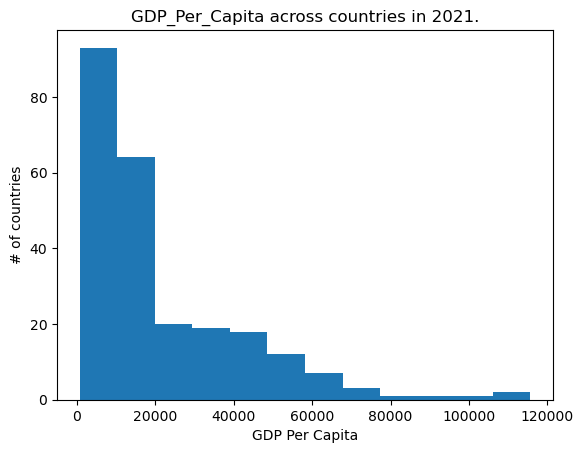

In [13]:

plt.hist(gdp_2021["GDP_Per_Capita"], bins = 12)
plt.title("GDP_Per_Capita across countries in 2021.")
plt.xlabel('GDP Per Capita')
plt.ylabel("# of countries")
plt.show()


###  It seems like the data is right skewed, with the majority being in the 0-20,000 GDP_Per_Capita range. 

## #12 - Find the top 5 countries and bottom 5 countries by GDP per capita in 2021.

In [14]:
gdp_2021_sorted = gdp_2021.sort_values('GDP_Per_Capita', ascending = False).reset_index()
gdp_2021_sorted.head(5)

,index,Country,Year,GDP_Per_Capita
0,4147,Luxembourg,2021,115683.493708
1,6107,Singapore,2021,107741.118436
2,3278,Ireland,2021,102785.490239
3,5745,Qatar,2021,92862.571798
4,680,Bermuda,2021,78570.489515


In [15]:
gdp_2021_sorted.tail(5)

,index,Country,Year,GDP_Per_Capita
236,5073,Niger,2021,1186.576809
237,6272,Somalia,2021,1136.735989
238,1629,Dem. Rep. Congo,2021,1073.643271
239,1216,Central African Republic,2021,837.504686
240,972,Burundi,2021,714.066712


## #13 - Pivot original data frame for only years 1990 and 2021, so each column is a year and each value is a GDP amount. Drop any rows that are missing values from either 1990 or 2021.

In [16]:
gdp_pivoted = gdp_df[(gdp_df['Year'] == 2021) | (gdp_df['Year'] == 1990)].pivot_table(values = 'GDP_Per_Capita', index = 'Country', columns = 'Year')

In [17]:
gdp_pivoted = gdp_pivoted.dropna()

## #14 - Create a new column in `gdp_pivoted` named `Percent_Change`. This column should contain the percent change in GDP_Per_Capita from 1990 to 2021. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.

In [18]:
gdp_pivoted['Percent_Change'] = (100*(gdp_pivoted[2021]-gdp_pivoted[1990]))/gdp_pivoted[1990]

## #15 - How many countries experienced a negative percent change in GDP per capita from 1990 to 2021?

In [19]:
test = gdp_pivoted[gdp_pivoted["Percent_Change"] < 0].count()
print(test)

Year
1990              19
2021              19
Percent_Change    19
dtype: int64


### 19 countries experienced a negative percent change in GDP per capita from 1990 and 2021.

## #16 - Which country had the highest % change in GDP per capita? Create a line plot showing this country's GDP per capita for all years from 1990 to 2018. Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare?  
**Bonus:** Put both line charts on the same plot.

In [20]:
highest_percent_change = gdp_pivoted.sort_values('Percent_Change',ascending = False)[0:2].reset_index()
highest_percent_change['Country'][0]

'Equatorial Guinea'

#### Equatorial Guinea had the highest % change in GDP per capita, and China had the second highest % change in GDP per capita.

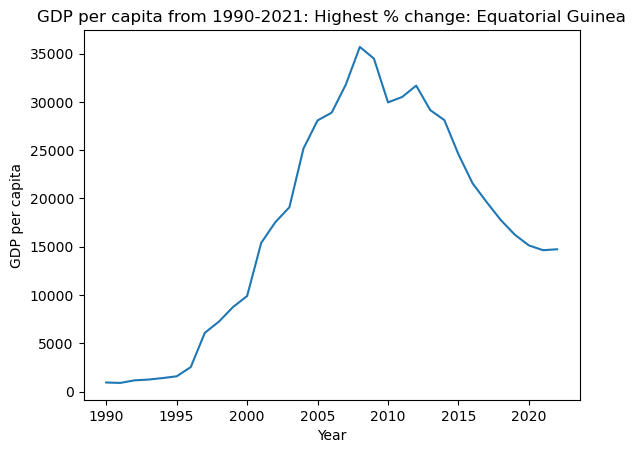

In [21]:
gdp_graph_highest = gdp_df[gdp_df["Country"] == highest_percent_change['Country'][0]]
plt.plot(gdp_graph_highest['Year'],gdp_graph_highest['GDP_Per_Capita'])
plt.title(f'GDP per capita from 1990-2021: Highest % change: {highest_percent_change["Country"][0]}')
plt.xlabel('Year')
plt.ylabel("GDP per capita")
plt.show()

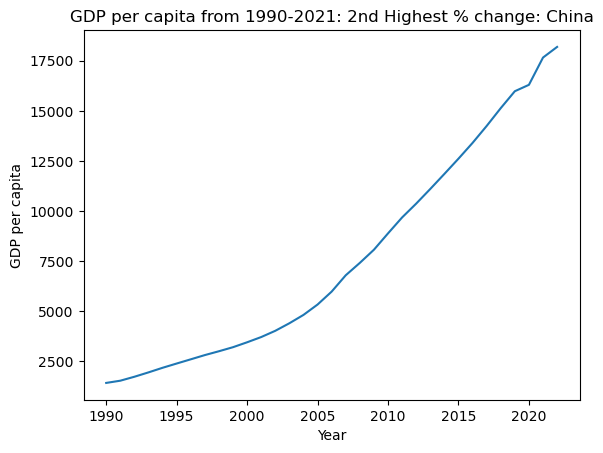

In [22]:
gdp_graph_2highest = gdp_df[gdp_df["Country"] == highest_percent_change['Country'][1]]
plt.plot(gdp_graph_2highest['Year'],gdp_graph_2highest['GDP_Per_Capita'])
plt.title(f'GDP per capita from 1990-2021: 2nd Highest % change: {highest_percent_change["Country"][1]}')
plt.xlabel('Year')
plt.ylabel("GDP per capita")
plt.show()

### The trends take a different path to growth, as china was always going up, while Equatorial Guinea reached a much larger maximum, but went down for some of the time. 

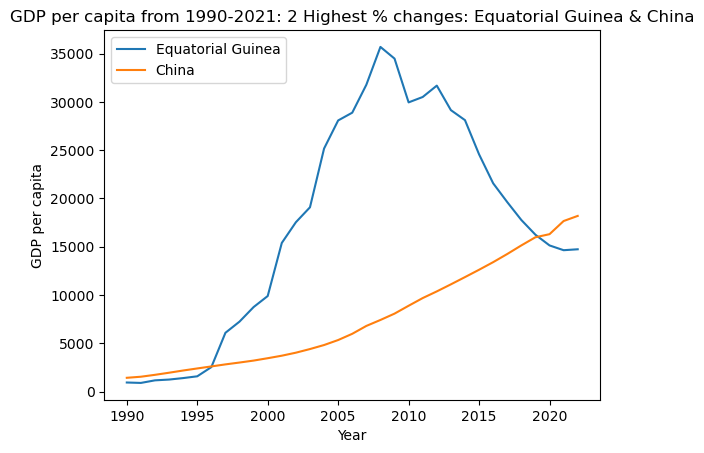

In [23]:
plt.plot(gdp_graph_highest['Year'],gdp_graph_highest['GDP_Per_Capita'], label=highest_percent_change["Country"][0])
plt.plot(gdp_graph_2highest['Year'],gdp_graph_2highest['GDP_Per_Capita'], label=highest_percent_change["Country"][1])
plt.title(f'GDP per capita from 1990-2021: 2 Highest % changes: {highest_percent_change["Country"][0]} & {highest_percent_change["Country"][1]}')
plt.xlabel('Year')
plt.ylabel("GDP per capita")
plt.legend(loc = "upper left")
plt.show()


## #17 - Read in continents.csv into DF called continents.

In [24]:
continents = pd.read_csv("../data/continents.csv")

#### "continents" was downloaded on October 3rd, 2024.

## #18 - Merge gdp_df and continents into gdp_df, only keep countries that appear in both data frames.

In [25]:
gdp_df = gdp_df.merge(continents)

In [26]:
np.where(gdp_df.isnull())

(array([], dtype=int64), array([], dtype=int64))

#### This line of code above shows that there are no empty values.

## #19 - Determine the number of countries per continent. Create a bar chart showing this.

In [27]:
gdp_drop = gdp_df.drop_duplicates("Country")
gdp_drop_df = gdp_drop['Continent'].value_counts().reset_index()

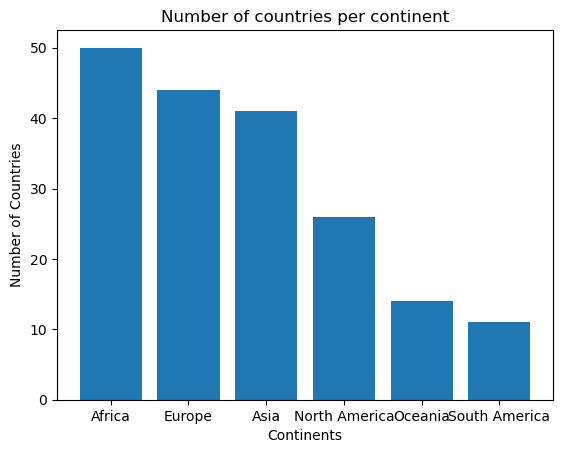

In [28]:
plt.bar(gdp_drop_df["Continent"],gdp_drop_df["count"])
plt.title('Number of countries per continent')
plt.xlabel('Continents')
plt.ylabel("Number of Countries")
plt.show()

## #20 - Create a seaborn boxplot showing GDP per capita in 2021 split out by continent. What do you notice?

In [29]:
gdp_df_2021 = gdp_df[gdp_df["Year"] == 2021]

<Axes: xlabel='Continent', ylabel='GDP_Per_Capita'>

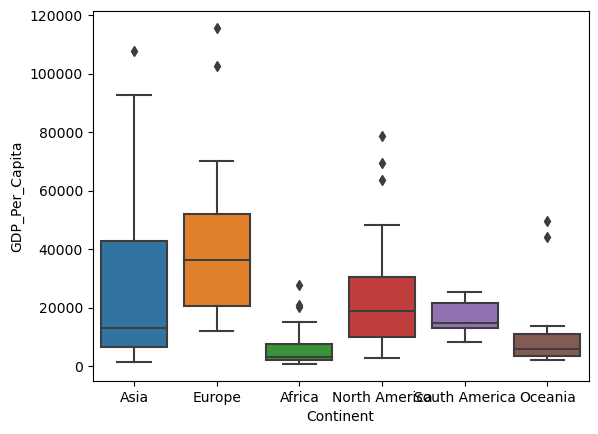

In [30]:
sns.boxplot(x = gdp_df_2021["Continent"], y = gdp_df_2021["GDP_Per_Capita"])

###   I notice that asia seems to have the widest range excluding outliers (and maybe including). Africa has the lowest range, and the lowest mean followed by oceania.

## #21 - Download life expectancy data into data frame called "life_expectancy"

In [31]:
life_expectancy = pd.read_csv("../data/life_exp.csv",skiprows = 3)

#### "life_exp" was downloaded on October 8th, 2024.

## #22 - Drop the Country Code, Indicator Name, and Indicator Code columns. Then use [`.melt()`] to convert your data from wide to long. That is, instead of having one row per country and multiple colums per year, we want to have multiple rows per country and a single column for year. After melting, rename the columns to `Country`, `Year`, and `Life_Expectancy`.

In [32]:
life_expectancy = life_expectancy.drop(["Country Code","Indicator Name","Indicator Code","Unnamed: 68"], axis = 1)

In [33]:
life_exp_years = list(life_expectancy.columns.values)



In [34]:
life_expectancy = life_expectancy.melt(id_vars = "Country Name", value_vars = life_exp_years)

In [35]:
life_expectancy = life_expectancy.rename(columns = {'variable':'Year','value':'Life_Expectancy','Country Name':'Country'})

## #23 - What was the first country with a life expectancy to exceed 80?

In [36]:
life_expectancy[life_expectancy["Life_Expectancy"] >80].sort_values("Year",ascending = True)

,Country,Year,Life_Expectancy
9695,Japan,1996,80.219756
9926,Gibraltar,1997,80.343000
9938,"Hong Kong SAR, China",1997,80.112195
9961,Japan,1997,80.424146
9988,"Macao SAR, China",1997,80.162000
...,...,...,...
16576,Gibraltar,2022,82.830000
16581,Greece,2022,80.636585
16588,"Hong Kong SAR, China",2022,83.660976
16550,Denmark,2022,81.304878


### Japan was the first Country to have a life expectancy of over 80, in 1996.

## #24 - Merge `gdp_df` and `life_expectancy`, keeping all countries and years that appear in both DataFrames. Save the result to a new DataFrame named `gdp_le`. If you get any errors in doing this, read them carefully and correct them. Look at the first five rows of your new data frame to confirm it merged correctly. Also, check the last five rows to make sure the data is clean and as expected.

In [37]:
life_expectancy[["Year"]] = life_expectancy[["Year"]].astype(int)

In [38]:
life_expectancy.convert_dtypes().dtypes

Country            string[python]
Year                        Int32
Life_Expectancy           Float64
dtype: object

In [39]:
gdp_le = gdp_df.merge(life_expectancy, validate = "one_to_one")

## #25 - Create a new DataFrame, named `gdp_le_2021` by extracting data for the year 2021 from `gdp_le`. How many countries have a life expectancy of at least 80 in 2021?

In [40]:
gdp_le_2021 = gdp_le[gdp_le['Year'] == 2021]

In [41]:
gdp_le_2021[gdp_le_2021["Life_Expectancy"] >= 80].count()

Country            31
Year               31
GDP_Per_Capita     31
Continent          31
Life_Expectancy    31
dtype: int64

### There were 31 countries that had a life expectancy greater than or equal to 80 years.

## #26 - Find the countries that had the top 3 largest GDP per capita figures for 2021. Create a [seaborn FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) showing the change in life expectancy over time for these three countries. Each individual figure in the facet grid will represent a single country.

In [42]:
gdp_le_2021_top_GDP = list(gdp_le_2021.sort_values("GDP_Per_Capita",ascending = False)['Country'][0:3])


In [43]:
print(f'The three countries with the largest GDP_Per_Capita are {gdp_le_2021_top_GDP[0]}, {gdp_le_2021_top_GDP[1]}, and {gdp_le_2021_top_GDP[2]}')

The three countries with the largest GDP_Per_Capita are Luxembourg, Singapore, and Ireland


C:\Users\teska\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


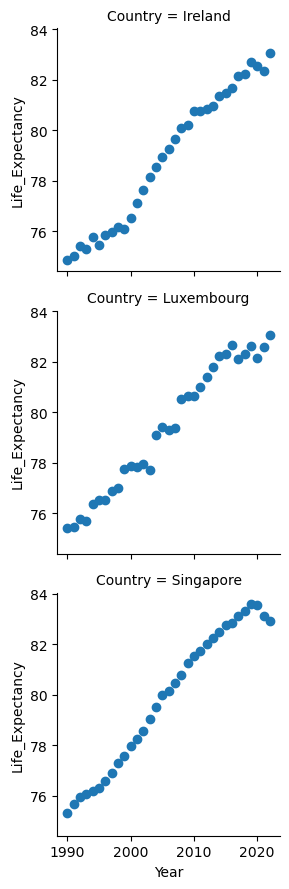

In [44]:
gdp_le_facet = gdp_le[gdp_le["Country"].isin([gdp_le_2021_top_GDP[0] , gdp_le_2021_top_GDP[1] , gdp_le_2021_top_GDP[2]])]
gdp_le_facet = gdp_le_facet.drop("GDP_Per_Capita", axis = 1)
gdp_le_facet = gdp_le_facet.drop("Continent", axis = 1)
graph = sns.FacetGrid(gdp_le_facet, row = "Country")
graph.map(plt.scatter, 'Year','Life_Expectancy')
plt.show()

## #27 - Create a scatter plot of Life Expectancy vs GDP per Capita for the year 2021. What do you notice?

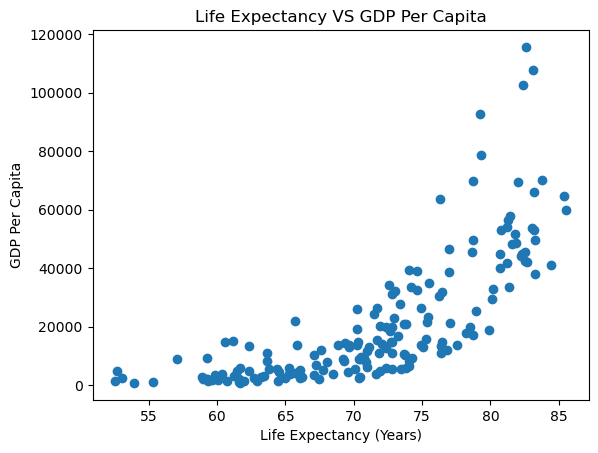

In [102]:
plt.scatter(gdp_le_2021["Life_Expectancy"],gdp_le_2021["GDP_Per_Capita"])
plt.title('Life Expectancy VS GDP Per Capita')
plt.xlabel('Life Expectancy (Years)')
plt.ylabel("GDP Per Capita")
plt.show()




### It seems that the countries that had a longer life expectancy seemed to have a larger GDP_Per_Capita

## #28 - Find the correlation between Life Expectancy and GDP per Capita for the year 2021. What is the meaning of this number?

In [47]:
gdp_le_2021["Life_Expectancy"].corr(gdp_le_2021['GDP_Per_Capita'])

0.7450812403297981

### This number is telling us that there is a pretty positive correlation between GDP and Life Exp. If a country has more GDP per capita compared to others, it will most likely have a longer life expectancy compared to others.

## #29 - Add a column to `gdp_le_2021` and calculate the logarithm of GDP per capita. Find the correlation between the log of GDP per capita and life expectancy. How does this compare to the calculation in the previous part? Look at a scatter plot to see if the result of this calculation makes sense.



In [48]:
gdp_le_2021["GDP_log"] = np.log(gdp_le_2021['GDP_Per_Capita'])

C:\Users\teska\AppData\Local\Temp\ipykernel_21532\2933400688.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_le_2021["GDP_log"] = np.log(gdp_le_2021['GDP_Per_Capita'])


In [50]:
gdp_le_2021["Life_Expectancy"].corr(gdp_le_2021['GDP_log'])

0.8465749797261853

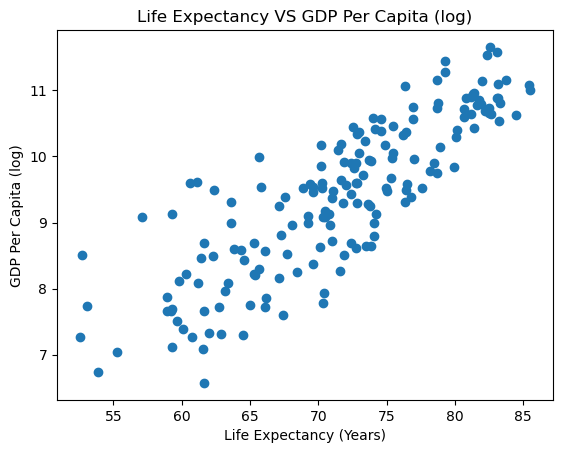

In [103]:
plt.scatter(gdp_le_2021["Life_Expectancy"],gdp_le_2021["GDP_log"])
plt.title('Life Expectancy VS GDP Per Capita (log)')
plt.xlabel('Life Expectancy (Years)')
plt.ylabel("GDP Per Capita (log)")
plt.show()

### This new correlation coefficient gives much more vaildation for correlation (even though they are similar). It matches well with the graph also, it just overall correlates more. It is more visible because previously, the GDP numbers were so much larger than the life exp number. 

# BONUS QUESTIONS

## #1 - Let's compare the median life expectacy for each across all of the years of data that we have. Perform a groupby on both Year and Continent and then aggregate using the median and save the results to a new object.


In [52]:
gdp_le.groupby(["Year"])

In [53]:
agg = gdp_le.groupby(["Year","Continent"])["Life_Expectancy"].median()

In [54]:
type(agg)

pandas.core.series.Series

In [55]:
agg


Year  Continent    
1990  Africa           52.496500
      Asia             66.957000
      Europe           74.846073
      North America    70.713500
      Oceania          65.508000
                         ...    
2022  Asia             74.075000
      Europe           80.080293
      North America    74.615000
      Oceania          68.312000
      South America    73.425000
Name: Life_Expectancy, Length: 198, dtype: float64

###  a) What type of object results from this?      
### It is a series.

### b) Look at the index of the resulting object. What do you notice about it? 
### It has two indicies. 

### c) Use .loc to select the median life expectancy for Asia in 2010

In [56]:
agg.loc[2010]["Asia"]

71.879

### d)  Use .loc to select the median life expectancy for both Asia and Africa in 2010

In [57]:
agg.loc[2010][["Asia", "Africa"]]

Continent
Asia      71.879
Africa    58.365
Name: Life_Expectancy, dtype: float64

### e  Use .loc to select the values for all continents for the year 2010.

In [58]:
agg.loc[2010][:]

Continent
Africa           58.365000
Asia             71.879000
Europe           78.481415
North America    74.190000
Oceania          68.030000
South America    73.711000
Name: Life_Expectancy, dtype: float64

### f) Use .loc to select the median life expectancy for Asia across all years. Hint: One way to do this is to use the swaplevels method.

In [59]:
agg.swaplevel().loc['Asia'][:]

Year
1990    66.957000
1991    67.884500
1992    68.102439
1993    67.367341
1994    67.942000
1995    68.223000
1996    68.702000
1997    69.225000
1998    69.572000
1999    70.088000
2000    70.355000
2001    69.887000
2002    70.375000
2003    70.488500
2004    69.095329
2005    71.153500
2006    71.098500
2007    71.266000
2008    71.146500
2009    69.910000
2010    71.879000
2011    72.015500
2012    72.173500
2013    72.432000
2014    72.031000
2015    73.188000
2016    73.482000
2017    73.891500
2018    73.971500
2019    74.210500
2020    73.272000
2021    72.541000
2022    74.075000
Name: Life_Expectancy, dtype: float64

## #2 - Group gdp_le by both Year and Continent and find the min, median, and max values for both gdp per capita and life expectancy. Hint: You may want to use the agg method.

In [60]:
gdp_le_agg = gdp_le.groupby(['Year','Continent'])[["Life_Expectancy","GDP_Per_Capita"]].aggregate([np.min,np.max,np.median])

In [61]:
gdp_le_agg

Life_Expectancy                       GDP_Per_Capita  \
                              amin       amax     median           amin   
Year Continent                                                            
1990 Africa              41.852000  70.110000  52.496500     460.123697   
     Asia                53.713000  78.837073  66.957000     581.613311   
     Europe              62.352000  77.536829  74.846073    4827.027705   
     North America       52.975000  77.436585  70.713500    3409.794251   
     Oceania             59.721000  76.994634  65.508000    2045.272278   
...                            ...        ...        ...            ...   
2022 Asia                66.431000  85.377000  74.075000    4001.699955   
     Europe              68.587927  83.453659  80.080293   10731.440430   
     North America       63.728000  81.571000  74.615000    2799.112561   
     Oceania             64.014000  83.200000  68.312000    2002.718218   
     South America       64.928000  79.519000  73.425000    8201.183799   

                                                 
                             amax        median  
Year Continent                                   
1990 Africa          17559.006114   2199.799280  
     Asia           105893.626059   5507.061391  
     Europe          70860.819124  26781.627609  
     North America   65961.406278   9788.684598  
     Oceania         31006.100227   3426.440476  
...                           ...           ...  
2022 Asia           108036.110993  12304.948125  
     Europe         115541.774828  37312.101564  
     North America   81165.650944  15106.775175  
     Oceania         50997.546433   5116.335518  
     South America   34420.067505  15093.465117  

[198 rows x 6 columns]

### a) It almost seems like there are two indicies for the columns. INdicies might not be the right word.

### b)

In [62]:
gdp_le_agg.loc[2010]['GDP_Per_Capita']['median']['Asia']

8602.903815568548

## #3

In [63]:
gdp_le

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
0,Afghanistan,2021,1517.016266,Asia,61.982
1,Afghanistan,2020,1968.341002,Asia,62.575
2,Afghanistan,2019,2079.921861,Asia,63.565
3,Afghanistan,2018,2060.698973,Asia,63.081
4,Afghanistan,2017,2096.093111,Asia,63.016
...,...,...,...,...,...
5558,Zimbabwe,1994,2670.106615,Africa,52.588
5559,Zimbabwe,1993,2458.783255,Africa,54.426
5560,Zimbabwe,1992,2468.278257,Africa,56.435
5561,Zimbabwe,1991,2781.787843,Africa,58.091


In [64]:
gdp_median_per_year = gdp_le.groupby("Year")["GDP_Per_Capita"].median()

### a)

In [65]:
gdp_median_per_year = gdp_median_per_year.reset_index()


In [66]:
gdp_median_per_year


,Year,GDP_Per_Capita
0,1990,7137.603720
1,1991,7222.317490
2,1992,7295.002788
3,1993,7195.420918
4,1994,6458.214173
5,1995,7752.202576
6,1996,7710.741389
7,1997,8189.045838
8,1998,8586.142794
9,1999,8635.254971


### b)

In [67]:
gdp_median_per_year["delta_GDP"] = gdp_median_per_year["GDP_Per_Capita"] - gdp_median_per_year["GDP_Per_Capita"].shift(periods = 1)

In [68]:
gdp_median_per_year

,Year,GDP_Per_Capita,delta_GDP
0,1990,7137.603720,NaN
1,1991,7222.317490,84.713770
2,1992,7295.002788,72.685298
3,1993,7195.420918,-99.581870
4,1994,6458.214173,-737.206745
5,1995,7752.202576,1293.988402
6,1996,7710.741389,-41.461186
7,1997,8189.045838,478.304449
8,1998,8586.142794,397.096956
9,1999,8635.254971,49.112176


### c)

In [69]:
gdp_median_per_year[gdp_median_per_year["delta_GDP"] < 0].count()

Year              4
GDP_Per_Capita    4
delta_GDP         4
dtype: int64

## #4

### a)

In [70]:
gdp_le = gdp_le.sort_values("Year",ascending = True)
gdp_le

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
5562,Zimbabwe,1990,2704.757299,Africa,59.426000
1973,Guinea,1990,1507.198522,Africa,47.004000
612,Bermuda,1990,65961.406278,North America,74.500000
5073,Tonga,1990,3625.499641,Oceania,67.294000
3095,Mali,1990,1336.571905,Africa,46.620000
...,...,...,...,...,...
1182,Comoros,2022,3245.768697,Africa,63.680000
3730,Norway,2022,67462.376446,Europe,82.560976
1215,Costa Rica,2022,21987.276870,North America,77.320000
1050,Chad,2022,1412.670718,Africa,52.997000


In [71]:
#gdp_le.groupby(["Country","Year"])["GDP_Per_Capita"].shift(periods = 1)
gdp_le.groupby(["Country"])["GDP_Per_Capita"].shift(periods = 1)
#gdp_le["GDP_per_Capita"]

5562             NaN
1973             NaN
612              NaN
5073             NaN
3095             NaN
            ...     
1182     3228.526858
3730    65909.003030
1215    21189.695663
1050     1425.494512
1116    17657.495181
Name: GDP_Per_Capita, Length: 5563, dtype: float64

In [72]:
gdp_le["delta_gdp"] = gdp_le["GDP_Per_Capita"]   -  gdp_le.groupby(["Country"])["GDP_Per_Capita"].shift(periods = 1) 

In [73]:
gdp_le[gdp_le["Country"] == "Zimbabwe"]

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy,delta_gdp
5562,Zimbabwe,1990,2704.757299,Africa,59.426,NaN
5561,Zimbabwe,1991,2781.787843,Africa,58.091,77.030544
5560,Zimbabwe,1992,2468.278257,Africa,56.435,-313.509587
5559,Zimbabwe,1993,2458.783255,Africa,54.426,-9.495002
5558,Zimbabwe,1994,2670.106615,Africa,52.588,211.323360
5557,Zimbabwe,1995,2641.378271,Africa,50.531,-28.728344
5556,Zimbabwe,1996,2867.026043,Africa,48.955,225.647771
5555,Zimbabwe,1997,2896.147308,Africa,47.993,29.121265
5554,Zimbabwe,1998,2931.725144,Africa,46.819,35.577836
5553,Zimbabwe,1999,2866.032886,Africa,45.206,-65.692258


### b)

In [74]:
gdp_le.sort_values("delta_gdp",ascending = False)

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy,delta_gdp
2914,"Macao SAR, China",2011,135365.387353,Asia,83.229000,21322.892045
2915,"Macao SAR, China",2010,114042.495308,Asia,83.109000,20501.825161
2828,Libya,2012,32214.906325,Africa,72.247000,15858.543663
2921,"Macao SAR, China",2004,72717.074546,Asia,81.691000,13679.137992
2305,Ireland,2015,71692.568204,Europe,81.453659,13500.959996
...,...,...,...,...,...,...
3498,Nauru,2004,5342.330551,Oceania,58.072000,NaN
1016,Cayman Islands,2006,84778.384261,North America,NaN,NaN
2604,Kosovo,2008,7032.452297,Europe,77.392000,NaN
4556,Somalia,2013,889.166677,Africa,53.843000,NaN


### Largest increase in GDP was China Macao SAR

In [75]:
gdp_le.sort_values("delta_gdp",ascending = True)

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy,delta_gdp
2905,"Macao SAR, China",2020,55158.712729,Asia,85.184,-67663.411727
2910,"Macao SAR, China",2015,116855.533716,Asia,83.984,-34760.868648
2903,"Macao SAR, China",2022,46871.971449,Asia,85.377,-17925.023688
2829,Libya,2011,16356.362662,Africa,70.071,-15037.799084
5285,United Arab Emirates,2007,79468.995469,Asia,77.129,-12854.567309
...,...,...,...,...,...,...
3498,Nauru,2004,5342.330551,Oceania,58.072,NaN
1016,Cayman Islands,2006,84778.384261,North America,NaN,NaN
2604,Kosovo,2008,7032.452297,Europe,77.392,NaN
4556,Somalia,2013,889.166677,Africa,53.843,NaN


### Largest decrease in GDP was also China Macao SAR

## #5

### a)

In [76]:
gdp_le_us = gdp_le[gdp_le["Country"] == 'United States']

In [77]:
gdp_le_us

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy,delta_gdp
5368,United States,1990,40451.498405,North America,75.214634,NaN
5367,United States,1991,39871.342964,North America,75.365854,-580.155441
5366,United States,1992,40707.290631,North America,75.617073,835.947667
5365,United States,1993,41279.516502,North America,75.419512,572.225871
5364,United States,1994,42419.195365,North America,75.619512,1139.678863
5363,United States,1995,43042.213822,North America,75.621951,623.018457
5362,United States,1996,44149.371129,North America,76.026829,1107.157307
5361,United States,1997,45560.920145,North America,76.429268,1411.549016
5360,United States,1998,47050.995083,North America,76.580488,1490.074938
5359,United States,1999,48743.882837,North America,76.582927,1692.887754


### b)

In [78]:
gdp_le_us['roll'] = gdp_le_us["GDP_Per_Capita"].rolling(3).mean()

C:\Users\teska\AppData\Local\Temp\ipykernel_21532\1741300405.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_le_us['roll'] = gdp_le_us["GDP_Per_Capita"].rolling(3).mean()


### c)

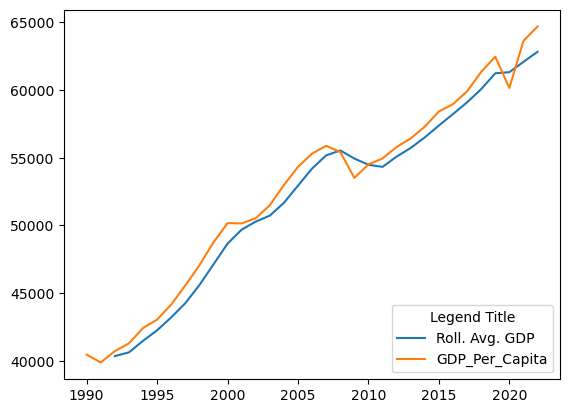

In [79]:
plt.plot(gdp_le_us['Year'],gdp_le_us['roll'])
plt.plot(gdp_le_us['Year'],gdp_le_us['GDP_Per_Capita'])
plt.legend(['Roll. Avg. GDP','GDP_Per_Capita'], loc='lower right', title='Legend Title')
plt.show()


## #6

In [80]:
gdp_le


,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy,delta_gdp
5562,Zimbabwe,1990,2704.757299,Africa,59.426000,NaN
1973,Guinea,1990,1507.198522,Africa,47.004000,NaN
612,Bermuda,1990,65961.406278,North America,74.500000,NaN
5073,Tonga,1990,3625.499641,Oceania,67.294000,NaN
3095,Mali,1990,1336.571905,Africa,46.620000,NaN
...,...,...,...,...,...,...
1182,Comoros,2022,3245.768697,Africa,63.680000,17.241839
3730,Norway,2022,67462.376446,Europe,82.560976,1553.373416
1215,Costa Rica,2022,21987.276870,North America,77.320000,797.581206
1050,Chad,2022,1412.670718,Africa,52.997000,-12.823794


In [81]:
gdp_le["Continent_Category"] = gdp_le["Continent"].astype("category")

In [82]:
gdp_le

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy,delta_gdp,Continent_Category
5562,Zimbabwe,1990,2704.757299,Africa,59.426000,NaN,Africa
1973,Guinea,1990,1507.198522,Africa,47.004000,NaN,Africa
612,Bermuda,1990,65961.406278,North America,74.500000,NaN,North America
5073,Tonga,1990,3625.499641,Oceania,67.294000,NaN,Oceania
3095,Mali,1990,1336.571905,Africa,46.620000,NaN,Africa
...,...,...,...,...,...,...,...
1182,Comoros,2022,3245.768697,Africa,63.680000,17.241839,Africa
3730,Norway,2022,67462.376446,Europe,82.560976,1553.373416,Europe
1215,Costa Rica,2022,21987.276870,North America,77.320000,797.581206,North America
1050,Chad,2022,1412.670718,Africa,52.997000,-12.823794,Africa


### b)

In [83]:
gdp_le['Continent'].memory_usage()

89008

In [84]:
gdp_le['Continent_Category'].memory_usage()

50287

### The continents in a type of category take less memory usage.

### c)

In [85]:
%%timeit magic

gdp_le.groupby("Continent")["GDP_Per_Capita"].aggregate(['mean','median'])

2.18 ms ± 563 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [86]:
%%timeit magic

gdp_le.groupby("Continent_Category")["GDP_Per_Capita"].aggregate(['mean','median'])

840 µs ± 47.8 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


### d)

In [87]:
gdp_le["Year_int16"] = gdp_le["Year"].astype("int16")

In [88]:
gdp_le

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy,delta_gdp,Continent_Category,Year_int16
5562,Zimbabwe,1990,2704.757299,Africa,59.426000,NaN,Africa,1990
1973,Guinea,1990,1507.198522,Africa,47.004000,NaN,Africa,1990
612,Bermuda,1990,65961.406278,North America,74.500000,NaN,North America,1990
5073,Tonga,1990,3625.499641,Oceania,67.294000,NaN,Oceania,1990
3095,Mali,1990,1336.571905,Africa,46.620000,NaN,Africa,1990
...,...,...,...,...,...,...,...,...
1182,Comoros,2022,3245.768697,Africa,63.680000,17.241839,Africa,2022
3730,Norway,2022,67462.376446,Europe,82.560976,1553.373416,Europe,2022
1215,Costa Rica,2022,21987.276870,North America,77.320000,797.581206,North America,2022
1050,Chad,2022,1412.670718,Africa,52.997000,-12.823794,Africa,2022


In [89]:
gdp_le["Year_int16"].memory_usage()

55630

In [90]:
gdp_le["Year"].memory_usage()

89008

### e)

In [91]:
cols = list(pd.read_csv("../data/gpd_per_capita.csv", nrows=1))
gdp_df_new = pd.read_csv("../data/gpd_per_capita.csv", usecols = [co for co in cols if co != "Value Footnotes"], dtype = {"Country or Area": "category", "Year": "int16"})

In [92]:
gdp_df_new

,Country or Area,Year,Value
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
...,...,...,...
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843


# Merging extra practice

In [93]:
intakes = pd.read_csv("../data/intakes.csv")
outcomes = pd.read_csv("../data/outcomes.csv")

In [94]:
intakes


,animal_id,name,datetime,datetime2,found_location,intake_type,intake_condition,animal_type,sex_upon_intake,age_upon_intake,breed,color
0,A786884,*Brock,2019-01-03T16:19:00.000,2019-01-03T16:19:00.000,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,2015-07-05T12:59:00.000,2015-07-05T12:59:00.000,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,A724273,Runster,2016-04-14T18:43:00.000,2016-04-14T18:43:00.000,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
3,A665644,NaN,2013-10-21T07:59:00.000,2013-10-21T07:59:00.000,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
4,A857105,Johnny Ringo,2022-05-12T00:23:00.000,2022-05-12T00:23:00.000,4404 Sarasota Drive in Austin (TX),Public Assist,Normal,Cat,Neutered Male,2 years,Domestic Shorthair,Orange Tabby
...,...,...,...,...,...,...,...,...,...,...,...,...
167813,A915157,NaN,2024-10-12T10:59:00.000,2024-10-12T10:59:00.000,Breckenridge Dr & Burleson Rd in Austin (TX),Stray,Normal,Dog,Unknown,1 year,German Shepherd Mix,Tan/Black
167814,A915073,NaN,2024-10-11T10:47:00.000,2024-10-11T10:47:00.000,10128 Forest Grove Drive in Austin (TX),Stray,Normal,Cat,Unknown,7 months,Domestic Shorthair,Orange Tabby
167815,A915156,Gizmo,2024-10-12T10:09:00.000,2024-10-12T10:09:00.000,501 Bastrop Highway North Bound in Austin (TX),Public Assist,Normal,Dog,Neutered Male,13 years,Chihuahua Shorthair,Fawn
167816,A914777,Nyla Amore,2024-10-07T10:36:00.000,2024-10-07T10:36:00.000,2700 Cullins Creek Drive in Austin (TX),Stray,Normal,Dog,Intact Female,2 months,German Shepherd Mix,Black/Tan


In [95]:
outcomes

,animal_id,name,datetime,monthyear,date_of_birth,outcome_type,outcome_subtype,animal_type,sex_upon_outcome,age_upon_outcome,breed,color
0,A799811,Angel,2019-10-22T08:21:00.000,2019-10-22T08:21:00.000,2012-07-12T00:00:00.000,Adoption,Foster,Dog,Spayed Female,7 years,Chihuahua Shorthair,Cream
1,A830483,NaN,2021-03-10T12:31:00.000,2021-03-10T12:31:00.000,2020-03-10T00:00:00.000,Euthanasia,Suffering,Cat,Intact Male,1 year,Domestic Shorthair,Seal Point
2,A700633,*Cole,2015-04-26T16:02:00.000,2015-04-26T16:02:00.000,2014-04-17T00:00:00.000,Adoption,NaN,Dog,Spayed Female,1 year,Italian Greyhound/Chihuahua Shorthair,Black
3,A665156,Baby Elic,2013-10-19T17:07:00.000,2013-10-19T17:07:00.000,2012-12-14T00:00:00.000,Adoption,NaN,Dog,Spayed Female,10 months,Border Collie Mix,White/Black
4,A880873,*Mandarin,2023-11-15T14:34:00.000,2023-11-15T14:34:00.000,2019-05-16T00:00:00.000,Adoption,NaN,Cat,Neutered Male,4 years,Domestic Shorthair,Brown Tabby
...,...,...,...,...,...,...,...,...,...,...,...,...
167747,A889857,Princess Rahja,2024-10-11T19:05:00.000,2024-10-11T19:05:00.000,2015-09-28T00:00:00.000,Adoption,NaN,Cat,Spayed Female,9 years,Domestic Shorthair,Brown Tabby
167748,A909575,Emma,2024-10-12T09:57:00.000,2024-10-12T09:57:00.000,2024-04-26T00:00:00.000,Adoption,NaN,Dog,Spayed Female,5 months,Labrador Retriever Mix,White/Tan
167749,A914515,Danny,2024-10-12T11:08:00.000,2024-10-12T11:08:00.000,2022-10-02T00:00:00.000,Return to Owner,NaN,Dog,Unknown,2 years,Pit Bull Mix,Red/White
167750,A915131,Charlie,2024-10-12T11:15:00.000,2024-10-12T11:15:00.000,2009-10-12T00:00:00.000,Return to Owner,NaN,Dog,Neutered Male,15 years,Labrador Retriever,Brown


## #0

In [96]:
pd.merge(left = intakes,
         right = outcomes,
         left_on = "animal_id",
         right_on = "animal_id",
         validate = "many_to_many")


,animal_id,name_x,datetime_x,datetime2,found_location,intake_type,intake_condition,animal_type_x,sex_upon_intake,age_upon_intake,...,datetime_y,monthyear,date_of_birth,outcome_type,outcome_subtype,animal_type_y,sex_upon_outcome,age_upon_outcome,breed_y,color_y
0,A786884,*Brock,2019-01-03T16:19:00.000,2019-01-03T16:19:00.000,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,...,2019-01-08T15:11:00.000,2019-01-08T15:11:00.000,2017-01-03T00:00:00.000,Transfer,Partner,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,2015-07-05T12:59:00.000,2015-07-05T12:59:00.000,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,...,2015-07-05T15:13:00.000,2015-07-05T15:13:00.000,2007-07-05T00:00:00.000,Return to Owner,NaN,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,A724273,Runster,2016-04-14T18:43:00.000,2016-04-14T18:43:00.000,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,...,2016-04-21T17:17:00.000,2016-04-21T17:17:00.000,2015-04-17T00:00:00.000,Return to Owner,NaN,Dog,Neutered Male,1 year,Basenji Mix,Sable/White
3,A665644,NaN,2013-10-21T07:59:00.000,2013-10-21T07:59:00.000,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,...,2013-10-21T11:39:00.000,2013-10-21T11:39:00.000,2013-09-21T00:00:00.000,Transfer,Partner,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
4,A857105,Johnny Ringo,2022-05-12T00:23:00.000,2022-05-12T00:23:00.000,4404 Sarasota Drive in Austin (TX),Public Assist,Normal,Cat,Neutered Male,2 years,...,2022-05-12T14:35:00.000,2022-05-12T14:35:00.000,2020-05-12T00:00:00.000,Transfer,Partner,Cat,Neutered Male,2 years,Domestic Shorthair,Orange Tabby
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213932,A914803,Blaze,2024-10-07T11:41:00.000,2024-10-07T11:41:00.000,3832 Cologne Ln in Austin (TX),Stray,Normal,Cat,Intact Male,2 months,...,2024-10-11T17:12:00.000,2024-10-11T17:12:00.000,2024-08-01T00:00:00.000,Adoption,NaN,Cat,Neutered Male,2 months,Domestic Shorthair,Brown Tabby/White
213933,A837399,Evie,2021-06-22T12:56:00.000,2021-06-22T12:56:00.000,137 Kelp Gull Drive in Travis (TX),Stray,Normal,Dog,Intact Female,3 months,...,2021-06-29T16:28:00.000,2021-06-29T16:28:00.000,2021-02-22T00:00:00.000,Adoption,NaN,Dog,Spayed Female,4 months,German Shepherd Mix,Tricolor
213934,A909575,Emma,2024-07-17T14:55:00.000,2024-07-17T14:55:00.000,3100 Arbor Leah Cv in Travis (TX),Stray,Normal,Dog,Intact Female,2 months,...,2024-10-12T09:57:00.000,2024-10-12T09:57:00.000,2024-04-26T00:00:00.000,Adoption,NaN,Dog,Spayed Female,5 months,Labrador Retriever Mix,White/Tan
213935,A914777,Nyla Amore,2024-10-07T10:36:00.000,2024-10-07T10:36:00.000,2700 Cullins Creek Drive in Austin (TX),Stray,Normal,Dog,Intact Female,2 months,...,2024-10-12T11:11:00.000,2024-10-12T11:11:00.000,2024-07-23T00:00:00.000,Adoption,NaN,Dog,Spayed Female,2 months,German Shepherd Mix,Black/Tan


### I tested the above code, and checked through all 4 choices in validate, and found that it is many to many.

## #1

In [97]:
merged = pd.merge(left = intakes,
         right = outcomes,
         left_on = "animal_id",
         right_on = "animal_id",
         how = 'right',
         indicator = True)

In [98]:
merged

,animal_id,name_x,datetime_x,datetime2,found_location,intake_type,intake_condition,animal_type_x,sex_upon_intake,age_upon_intake,...,monthyear,date_of_birth,outcome_type,outcome_subtype,animal_type_y,sex_upon_outcome,age_upon_outcome,breed_y,color_y,_merge
0,A799811,Angel,2019-07-12T10:58:00.000,2019-07-12T10:58:00.000,Austin (TX),Owner Surrender,Normal,Dog,Spayed Female,7 years,...,2019-10-22T08:21:00.000,2012-07-12T00:00:00.000,Adoption,Foster,Dog,Spayed Female,7 years,Chihuahua Shorthair,Cream,both
1,A830483,NaN,2021-03-10T11:49:00.000,2021-03-10T11:49:00.000,600 Barwood Park in Austin (TX),Stray,Normal,Cat,Intact Male,1 year,...,2021-03-10T12:31:00.000,2020-03-10T00:00:00.000,Euthanasia,Suffering,Cat,Intact Male,1 year,Domestic Shorthair,Seal Point,both
2,A700633,*Cole,2015-04-17T11:05:00.000,2015-04-17T11:05:00.000,Hergotz Lane & Thompson Lane in Austin (TX),Stray,Normal,Dog,Intact Female,1 year,...,2015-04-26T16:02:00.000,2014-04-17T00:00:00.000,Adoption,NaN,Dog,Spayed Female,1 year,Italian Greyhound/Chihuahua Shorthair,Black,both
3,A665156,Baby Elic,2013-10-14T13:45:00.000,2013-10-14T13:45:00.000,Wm Cannon And Pleasant Valley in Austin (TX),Stray,Normal,Dog,Intact Female,9 months,...,2013-10-19T17:07:00.000,2012-12-14T00:00:00.000,Adoption,NaN,Dog,Spayed Female,10 months,Border Collie Mix,White/Black,both
4,A880873,*Mandarin,2023-05-15T12:13:00.000,2023-05-15T12:13:00.000,5806 Encinal Cove in Austin (TX),Owner Surrender,Normal,Cat,Neutered Male,4 years,...,2023-11-15T14:34:00.000,2019-05-16T00:00:00.000,Adoption,NaN,Cat,Neutered Male,4 years,Domestic Shorthair,Brown Tabby,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214747,A889857,Princess Rahja,2024-09-30T13:42:00.000,2024-09-30T13:42:00.000,Austin (TX),Owner Surrender,Normal,Cat,Spayed Female,9 years,...,2024-10-11T19:05:00.000,2015-09-28T00:00:00.000,Adoption,NaN,Cat,Spayed Female,9 years,Domestic Shorthair,Brown Tabby,both
214748,A909575,Emma,2024-07-17T14:55:00.000,2024-07-17T14:55:00.000,3100 Arbor Leah Cv in Travis (TX),Stray,Normal,Dog,Intact Female,2 months,...,2024-10-12T09:57:00.000,2024-04-26T00:00:00.000,Adoption,NaN,Dog,Spayed Female,5 months,Labrador Retriever Mix,White/Tan,both
214749,A914515,Danny,2024-10-02T10:35:00.000,2024-10-02T10:35:00.000,S Lamar Blvd And Riverside Dr in Austin (TX),Public Assist,Normal,Dog,Unknown,2 years,...,2024-10-12T11:08:00.000,2022-10-02T00:00:00.000,Return to Owner,NaN,Dog,Unknown,2 years,Pit Bull Mix,Red/White,both
214750,A915131,Charlie,2024-10-11T16:25:00.000,2024-10-11T16:25:00.000,4619 Richmond in Austin (TX),Stray,Aged,Dog,Neutered Male,15 years,...,2024-10-12T11:15:00.000,2009-10-12T00:00:00.000,Return to Owner,NaN,Dog,Neutered Male,15 years,Labrador Retriever,Brown,both


In [99]:
#assert len(merged[merged['_merge'] != 'both']) == 0, "Some rows in the right table didn't have a match."

### I ran this code two times, once with it coming in from the left and one from it coming from the right and they both said that some rows don't have matches. 

## #2

In [100]:
intakes.set_index("animal_id")

,name,datetime,datetime2,found_location,intake_type,intake_condition,animal_type,sex_upon_intake,age_upon_intake,breed,color
animal_id,,,,,,,,,,,
A786884,*Brock,2019-01-03T16:19:00.000,2019-01-03T16:19:00.000,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
A706918,Belle,2015-07-05T12:59:00.000,2015-07-05T12:59:00.000,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
A724273,Runster,2016-04-14T18:43:00.000,2016-04-14T18:43:00.000,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
A665644,NaN,2013-10-21T07:59:00.000,2013-10-21T07:59:00.000,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
A857105,Johnny Ringo,2022-05-12T00:23:00.000,2022-05-12T00:23:00.000,4404 Sarasota Drive in Austin (TX),Public Assist,Normal,Cat,Neutered Male,2 years,Domestic Shorthair,Orange Tabby
...,...,...,...,...,...,...,...,...,...,...,...
A915157,NaN,2024-10-12T10:59:00.000,2024-10-12T10:59:00.000,Breckenridge Dr & Burleson Rd in Austin (TX),Stray,Normal,Dog,Unknown,1 year,German Shepherd Mix,Tan/Black
A915073,NaN,2024-10-11T10:47:00.000,2024-10-11T10:47:00.000,10128 Forest Grove Drive in Austin (TX),Stray,Normal,Cat,Unknown,7 months,Domestic Shorthair,Orange Tabby
A915156,Gizmo,2024-10-12T10:09:00.000,2024-10-12T10:09:00.000,501 Bastrop Highway North Bound in Austin (TX),Public Assist,Normal,Dog,Neutered Male,13 years,Chihuahua Shorthair,Fawn


In [101]:
outcomes.set_index("animal_id")

,name,datetime,monthyear,date_of_birth,outcome_type,outcome_subtype,animal_type,sex_upon_outcome,age_upon_outcome,breed,color
animal_id,,,,,,,,,,,
A799811,Angel,2019-10-22T08:21:00.000,2019-10-22T08:21:00.000,2012-07-12T00:00:00.000,Adoption,Foster,Dog,Spayed Female,7 years,Chihuahua Shorthair,Cream
A830483,NaN,2021-03-10T12:31:00.000,2021-03-10T12:31:00.000,2020-03-10T00:00:00.000,Euthanasia,Suffering,Cat,Intact Male,1 year,Domestic Shorthair,Seal Point
A700633,*Cole,2015-04-26T16:02:00.000,2015-04-26T16:02:00.000,2014-04-17T00:00:00.000,Adoption,NaN,Dog,Spayed Female,1 year,Italian Greyhound/Chihuahua Shorthair,Black
A665156,Baby Elic,2013-10-19T17:07:00.000,2013-10-19T17:07:00.000,2012-12-14T00:00:00.000,Adoption,NaN,Dog,Spayed Female,10 months,Border Collie Mix,White/Black
A880873,*Mandarin,2023-11-15T14:34:00.000,2023-11-15T14:34:00.000,2019-05-16T00:00:00.000,Adoption,NaN,Cat,Neutered Male,4 years,Domestic Shorthair,Brown Tabby
...,...,...,...,...,...,...,...,...,...,...,...
A889857,Princess Rahja,2024-10-11T19:05:00.000,2024-10-11T19:05:00.000,2015-09-28T00:00:00.000,Adoption,NaN,Cat,Spayed Female,9 years,Domestic Shorthair,Brown Tabby
A909575,Emma,2024-10-12T09:57:00.000,2024-10-12T09:57:00.000,2024-04-26T00:00:00.000,Adoption,NaN,Dog,Spayed Female,5 months,Labrador Retriever Mix,White/Tan
A914515,Danny,2024-10-12T11:08:00.000,2024-10-12T11:08:00.000,2022-10-02T00:00:00.000,Return to Owner,NaN,Dog,Unknown,2 years,Pit Bull Mix,Red/White
